# Wildfire Analysis

Wildfire data: [Kaggle](https://www.kaggle.com/datasets/rtatman/188-million-us-wildfires)

Wildfire weather data: [Kaggle](https://www.kaggle.com/datasets/leternnoz/188-million-us-wildfires-weather-data)

## Import libraries

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set_theme()
sns.set_palette('colorblind')

## Import data

In [2]:
wildfire_df = pd.read_csv('wildfire.csv')
wildfire_df.head()

/tmp/ipykernel_4983/2709769131.py:1: DtypeWarning: Columns (8,10,11,12,13,14,15,16,17,18,35,37) have mixed types. Specify dtype option on import or set low_memory=False.
  wildfire_df = pd.read_csv('wildfire.csv')


,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_INCIDENT_NUMBER,ICS_209_NAME,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,511,Plumas National Forest,1,PNF-47,BJ8K,FOUNTAIN,NaN,NaN,NaN,NaN,NaN,2005,2453403.5,33,1300.0,9.0,Miscellaneous,2453403.5,33.0,1730.0,0.10,A,40.036944,-121.005833,5.0,USFS,CA,63.0,63.0,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,13,13,AAC0,PIGEON,NaN,NaN,NaN,NaN,NaN,2004,2453137.5,133,845.0,1.0,Lightning,2453137.5,133.0,1530.0,0.25,A,38.933056,-120.404444,5.0,USFS,CA,61.0,61.0,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,27,021,A32W,SLACK,NaN,NaN,NaN,NaN,NaN,2004,2453156.5,152,1921.0,5.0,Debris Burning,2453156.5,152.0,2024.0,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17.0,17.0,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,43,6,NaN,DEER,NaN,NaN,NaN,NaN,NaN,2004,2453184.5,180,1600.0,1.0,Lightning,2453189.5,185.0,1400.0,0.10,A,38.559167,-119.913333,5.0,USFS,CA,3.0,3.0,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,44,7,NaN,STEVENOT,NaN,NaN,NaN,NaN,NaN,2004,2453184.5,180,1600.0,1.0,Lightning,2453189.5,185.0,1200.0,0.10,A,38.559167,-119.933056,5.0,USFS,CA,3.0,3.0,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...


In [3]:
# import 
weather_df = pd.read_csv('weather.csv')
weather_df.head()

,temp_mean_0,prcp_sum_0,wspd_mean_0,temp_mean_10,prcp_sum_10,wspd_mean_10,temp_mean_30,prcp_sum_30,wspd_mean_20,temp_mean_60,prcp_sum_60,wspd_mean_60,temp_mean_180,prcp_sum_180,wspd_mean_180,OBJECTID
0,6.9,0.0,19.3,3.970,0.0,14.170000,4.646667,39.05,10.910714,4.668421,94.9,11.946154,9.828977,287.05,10.686905,1
1,6.8,0.0,9.5,10.155,5.5,13.870000,8.133333,6.00,13.038333,8.100847,6.0,11.572881,3.219101,107.50,10.496348,2
2,17.3,0.0,NaN,12.030,0.0,9.711111,11.323333,5.50,10.455172,10.087931,6.0,11.286538,6.210651,107.50,10.915244,3
3,14.7,0.0,6.0,14.690,0.0,7.650000,13.303333,0.00,8.930000,11.035000,0.0,10.126667,4.577326,0.00,9.742105,4
4,14.7,0.0,6.0,14.690,0.0,7.650000,13.303333,0.00,8.930000,11.035000,0.0,10.126667,4.577326,0.00,9.742105,5


In [4]:
df = wildfire_df.merge(weather_df, on='OBJECTID')
df.head()

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_INCIDENT_NUMBER,ICS_209_NAME,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape,temp_mean_0,prcp_sum_0,wspd_mean_0,temp_mean_10,prcp_sum_10,wspd_mean_10,temp_mean_30,prcp_sum_30,wspd_mean_20,temp_mean_60,prcp_sum_60,wspd_mean_60,temp_mean_180,prcp_sum_180,wspd_mean_180
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,511,Plumas National Forest,1,PNF-47,BJ8K,FOUNTAIN,NaN,NaN,NaN,NaN,NaN,2005,2453403.5,33,1300.0,9.0,Miscellaneous,2453403.5,33.0,1730.0,0.10,A,40.036944,-121.005833,5.0,USFS,CA,63.0,63.0,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...,6.9,0.0,19.3,3.970,0.0,14.170000,4.646667,39.05,10.910714,4.668421,94.9,11.946154,9.828977,287.05,10.686905
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,13,13,AAC0,PIGEON,NaN,NaN,NaN,NaN,NaN,2004,2453137.5,133,845.0,1.0,Lightning,2453137.5,133.0,1530.0,0.25,A,38.933056,-120.404444,5.0,USFS,CA,61.0,61.0,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...,6.8,0.0,9.5,10.155,5.5,13.870000,8.133333,6.00,13.038333,8.100847,6.0,11.572881,3.219101,107.50,10.496348
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,27,021,A32W,SLACK,NaN,NaN,NaN,NaN,NaN,2004,2453156.5,152,1921.0,5.0,Debris Burning,2453156.5,152.0,2024.0,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17.0,17.0,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...,17.3,0.0,NaN,12.030,0.0,9.711111,11.323333,5.50,10.455172,10.087931,6.0,11.286538,6.210651,107.50,10.915244
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,43,6,NaN,DEER,NaN,NaN,NaN,NaN,NaN,2004,2453184.5,180,1600.0,1.0,Lightning,2453189.5,185.0,1400.0,0.10,A,38.559167,-119.913333,5.0,USFS,CA,3.0,3.0,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...,14.7,0.0,6.0,14.690,0.0,7.650000,13.303333,0.00,8.930000,11.035000,0.0,10.126667,4.577326,0.00,9.742105
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,44,7,NaN,STEVENOT,NaN,NaN,NaN,NaN,NaN,2004,2453184.5,180,1600.0,1.0,Lightning,2453189.5,185.0,1200.0,0.10,A,38.559167,-119.933056,5.0,USFS,CA,3.0,3.0,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...,14.7,0.0,6.0,14.690,0.0,7.650000,13.303333,0.00,8.930000,11.035000,0.0,10.126667,4.577326,0.00,9.742105


In [5]:
df.columns = df.columns.str.lower()
df.head()

,objectid,fod_id,fpa_id,source_system_type,source_system,nwcg_reporting_agency,nwcg_reporting_unit_id,nwcg_reporting_unit_name,source_reporting_unit,source_reporting_unit_name,local_fire_report_id,local_incident_id,fire_code,fire_name,ics_209_incident_number,ics_209_name,mtbs_id,mtbs_fire_name,complex_name,fire_year,discovery_date,discovery_doy,discovery_time,stat_cause_code,stat_cause_descr,cont_date,cont_doy,cont_time,fire_size,fire_size_class,latitude,longitude,owner_code,owner_descr,state,county,fips_code,fips_name,shape,temp_mean_0,prcp_sum_0,wspd_mean_0,temp_mean_10,prcp_sum_10,wspd_mean_10,temp_mean_30,prcp_sum_30,wspd_mean_20,temp_mean_60,prcp_sum_60,wspd_mean_60,temp_mean_180,prcp_sum_180,wspd_mean_180
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,511,Plumas National Forest,1,PNF-47,BJ8K,FOUNTAIN,NaN,NaN,NaN,NaN,NaN,2005,2453403.5,33,1300.0,9.0,Miscellaneous,2453403.5,33.0,1730.0,0.10,A,40.036944,-121.005833,5.0,USFS,CA,63.0,63.0,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...,6.9,0.0,19.3,3.970,0.0,14.170000,4.646667,39.05,10.910714,4.668421,94.9,11.946154,9.828977,287.05,10.686905
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,13,13,AAC0,PIGEON,NaN,NaN,NaN,NaN,NaN,2004,2453137.5,133,845.0,1.0,Lightning,2453137.5,133.0,1530.0,0.25,A,38.933056,-120.404444,5.0,USFS,CA,61.0,61.0,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...,6.8,0.0,9.5,10.155,5.5,13.870000,8.133333,6.00,13.038333,8.100847,6.0,11.572881,3.219101,107.50,10.496348
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,27,021,A32W,SLACK,NaN,NaN,NaN,NaN,NaN,2004,2453156.5,152,1921.0,5.0,Debris Burning,2453156.5,152.0,2024.0,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17.0,17.0,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...,17.3,0.0,NaN,12.030,0.0,9.711111,11.323333,5.50,10.455172,10.087931,6.0,11.286538,6.210651,107.50,10.915244
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,43,6,NaN,DEER,NaN,NaN,NaN,NaN,NaN,2004,2453184.5,180,1600.0,1.0,Lightning,2453189.5,185.0,1400.0,0.10,A,38.559167,-119.913333,5.0,USFS,CA,3.0,3.0,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...,14.7,0.0,6.0,14.690,0.0,7.650000,13.303333,0.00,8.930000,11.035000,0.0,10.126667,4.577326,0.00,9.742105
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,44,7,NaN,STEVENOT,NaN,NaN,NaN,NaN,NaN,2004,2453184.5,180,1600.0,1.0,Lightning,2453189.5,185.0,1200.0,0.10,A,38.559167,-119.933056,5.0,USFS,CA,3.0,3.0,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...,14.7,0.0,6.0,14.690,0.0,7.650000,13.303333,0.00,8.930000,11.035000,0.0,10.126667,4.577326,0.00,9.742105


## Exploratory Data Analysis

In [6]:
# check number of duplicates
print('Number of duplicated rows: ', df.duplicated().sum())

# drop duplicates
print('Number of rows before dropping duplicates: ', len(df))
df.drop_duplicates(inplace=True)
print('Number of rows after dropping duplicates: ', len(df))

Number of duplicated rows:  18
Number of rows before dropping duplicates:  1830945
Number of rows after dropping duplicates:  1830927


In [7]:
# check number of missing values per column
df.isnull().sum()

objectid                            0
fod_id                              0
fpa_id                              0
source_system_type                  0
source_system                       0
nwcg_reporting_agency               0
nwcg_reporting_unit_id              0
nwcg_reporting_unit_name            0
source_reporting_unit               0
source_reporting_unit_name          0
local_fire_report_id          1415632
local_incident_id              788503
fire_code                     1509471
fire_name                      923478
ics_209_incident_number       1805297
ics_209_name                  1805298
mtbs_id                       1819962
mtbs_fire_name                1819962
complex_name                  1825791
fire_year                           0
discovery_date                      0
discovery_doy                       0
discovery_time                 849910
stat_cause_code                     0
stat_cause_descr                    0
cont_date                      858023
cont_doy    

In [8]:
# check the percentage of missing values per column
columns_nulls = round(df.isnull().sum() / len(df), 2)
columns_nulls

objectid                      0.00
fod_id                        0.00
fpa_id                        0.00
source_system_type            0.00
source_system                 0.00
nwcg_reporting_agency         0.00
nwcg_reporting_unit_id        0.00
nwcg_reporting_unit_name      0.00
source_reporting_unit         0.00
source_reporting_unit_name    0.00
local_fire_report_id          0.77
local_incident_id             0.43
fire_code                     0.82
fire_name                     0.50
ics_209_incident_number       0.99
ics_209_name                  0.99
mtbs_id                       0.99
mtbs_fire_name                0.99
complex_name                  1.00
fire_year                     0.00
discovery_date                0.00
discovery_doy                 0.00
discovery_time                0.46
stat_cause_code               0.00
stat_cause_descr              0.00
cont_date                     0.47
cont_doy                      0.47
cont_time                     0.51
fire_size           

In [9]:
# get columns name that have >70% of data missing
cols_to_drop = columns_nulls[columns_nulls > 0.7].index.to_list()
cols_to_drop

['local_fire_report_id',
 'fire_code',
 'ics_209_incident_number',
 'ics_209_name',
 'mtbs_id',
 'mtbs_fire_name',
 'complex_name']

In [10]:
# drop the columns
cleaned_df = df.drop(cols_to_drop, axis=1)
cleaned_df.columns

Index(['objectid', 'fod_id', 'fpa_id', 'source_system_type', 'source_system',
       'nwcg_reporting_agency', 'nwcg_reporting_unit_id',
       'nwcg_reporting_unit_name', 'source_reporting_unit',
       'source_reporting_unit_name', 'local_incident_id', 'fire_name',
       'fire_year', 'discovery_date', 'discovery_doy', 'discovery_time',
       'stat_cause_code', 'stat_cause_descr', 'cont_date', 'cont_doy',
       'cont_time', 'fire_size', 'fire_size_class', 'latitude', 'longitude',
       'owner_code', 'owner_descr', 'state', 'county', 'fips_code',
       'fips_name', 'shape', 'temp_mean_0', 'prcp_sum_0', 'wspd_mean_0',
       'temp_mean_10', 'prcp_sum_10', 'wspd_mean_10', 'temp_mean_30',
       'prcp_sum_30', 'wspd_mean_20', 'temp_mean_60', 'prcp_sum_60',
       'wspd_mean_60', 'temp_mean_180', 'prcp_sum_180', 'wspd_mean_180'],
      dtype='object')

In [11]:
cleaned_df.head()

,objectid,fod_id,fpa_id,source_system_type,source_system,nwcg_reporting_agency,nwcg_reporting_unit_id,nwcg_reporting_unit_name,source_reporting_unit,source_reporting_unit_name,local_incident_id,fire_name,fire_year,discovery_date,discovery_doy,discovery_time,stat_cause_code,stat_cause_descr,cont_date,cont_doy,cont_time,fire_size,fire_size_class,latitude,longitude,owner_code,owner_descr,state,county,fips_code,fips_name,shape,temp_mean_0,prcp_sum_0,wspd_mean_0,temp_mean_10,prcp_sum_10,wspd_mean_10,temp_mean_30,prcp_sum_30,wspd_mean_20,temp_mean_60,prcp_sum_60,wspd_mean_60,temp_mean_180,prcp_sum_180,wspd_mean_180
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,511,Plumas National Forest,PNF-47,FOUNTAIN,2005,2453403.5,33,1300.0,9.0,Miscellaneous,2453403.5,33.0,1730.0,0.10,A,40.036944,-121.005833,5.0,USFS,CA,63.0,63.0,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...,6.9,0.0,19.3,3.970,0.0,14.170000,4.646667,39.05,10.910714,4.668421,94.9,11.946154,9.828977,287.05,10.686905
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,13,PIGEON,2004,2453137.5,133,845.0,1.0,Lightning,2453137.5,133.0,1530.0,0.25,A,38.933056,-120.404444,5.0,USFS,CA,61.0,61.0,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...,6.8,0.0,9.5,10.155,5.5,13.870000,8.133333,6.00,13.038333,8.100847,6.0,11.572881,3.219101,107.50,10.496348
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,021,SLACK,2004,2453156.5,152,1921.0,5.0,Debris Burning,2453156.5,152.0,2024.0,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17.0,17.0,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...,17.3,0.0,NaN,12.030,0.0,9.711111,11.323333,5.50,10.455172,10.087931,6.0,11.286538,6.210651,107.50,10.915244
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,6,DEER,2004,2453184.5,180,1600.0,1.0,Lightning,2453189.5,185.0,1400.0,0.10,A,38.559167,-119.913333,5.0,USFS,CA,3.0,3.0,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...,14.7,0.0,6.0,14.690,0.0,7.650000,13.303333,0.00,8.930000,11.035000,0.0,10.126667,4.577326,0.00,9.742105
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,7,STEVENOT,2004,2453184.5,180,1600.0,1.0,Lightning,2453189.5,185.0,1200.0,0.10,A,38.559167,-119.933056,5.0,USFS,CA,3.0,3.0,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...,14.7,0.0,6.0,14.690,0.0,7.650000,13.303333,0.00,8.930000,11.035000,0.0,10.126667,4.577326,0.00,9.742105


In [12]:
# export merged data
# cleaned_df.to_csv('cleaned_joined_df.csv', index=False)

### Visualization

#### Most Frequent Causes of Wildfires

In [22]:
cause_counts = cleaned_df['stat_cause_descr'].value_counts()
cause_counts

stat_cause_descr
Debris Burning       424854
Miscellaneous        319534
Lightning            276260
Arson                273421
Equipment Use        144483
Missing/Undefined    142838
Campfire              75178
Children              60241
Smoking               52562
Railroad              32077
Powerline             14411
Fireworks             11303
Structure              3765
Name: count, dtype: int64

/tmp/ipykernel_4983/1389342240.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(xlabels)


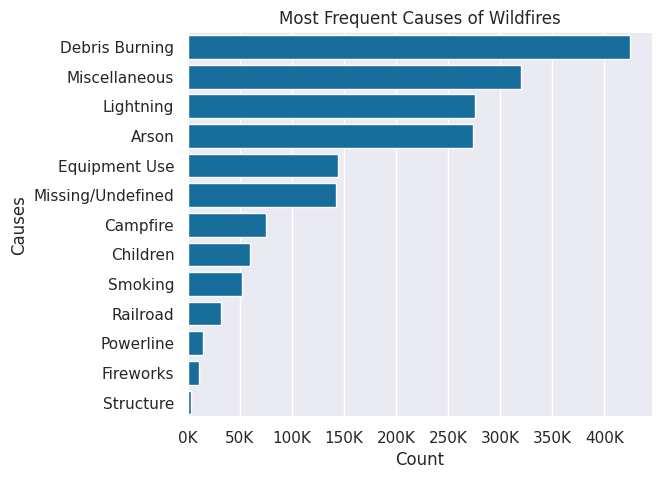

In [61]:
fig, ax = plt.subplots(figsize=(6,5))

g = sns.barplot(y=cause_counts.index, x=cause_counts.values)
g.set(title='Most Frequent Causes of Wildfires', xlabel='Count', ylabel='Causes')

xlabels = ['{:.0f}'.format(x) + 'K' for x in g.get_xticks()/1000]
g.set_xticklabels(xlabels)

plt.show()

#### Number of Wildfires per State

In [63]:
wildfires_per_state = cleaned_df['state'].value_counts()
wildfires_per_state

state
CA    185676
GA    163442
TX    141770
NC    110361
FL     88841
SC     80429
NY     80110
MS     79193
AZ     70130
AL     63626
OR     60676
MN     43909
OK     41637
MT     40499
NM     37265
ID     36499
CO     33719
WA     33375
WI     31372
AR     31311
TN     30901
SD     30705
UT     30541
LA     29080
KY     26969
NJ     25531
WV     21905
VA     21735
MO     17526
NV     16745
ND     14977
WY     14121
ME     13029
AK     12801
MI     10439
HI      9870
PA      8677
NE      7892
KS      7395
CT      4628
IA      4079
MD      3607
OH      3441
MA      2559
NH      2380
IL      2304
IN      2086
RI       480
VT       449
DE       170
DC        65
Name: count, dtype: int64

/tmp/ipykernel_4983/439658321.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(xlabels)


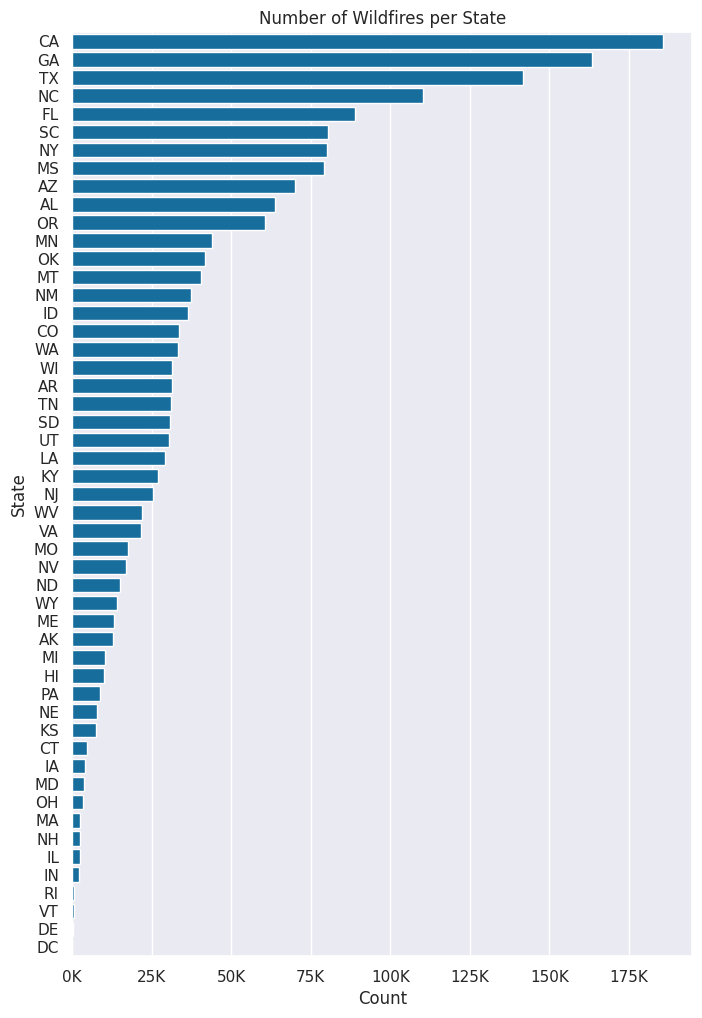

In [72]:
fig, ax = plt.subplots(figsize=(8,12))

g = sns.barplot(y=wildfires_per_state.index, x=wildfires_per_state.values)
g.set(title='Number of Wildfires per State', xlabel='Count', ylabel='State')

xlabels = ['{:.0f}'.format(x) + 'K' for x in g.get_xticks()/1000]
g.set_xticklabels(xlabels)

plt.show()

#### 

In [74]:
fire_sizes = cleaned_df['fire_size_class'].value_counts()
fire_sizes

fire_size_class
B    908052
A    654739
C    214619
D     28037
E     13965
F      7753
G      3762
Name: count, dtype: int64

/tmp/ipykernel_4983/3145535018.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_yticklabels(xlabels)


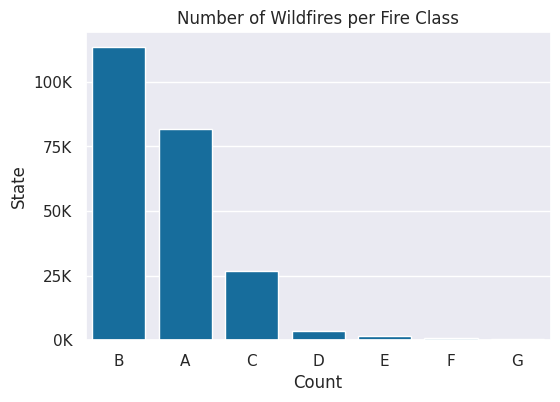

In [83]:
'''
`fire_size_class`: Code for fire size based on the number of acres within the final fire perimeter expenditures.
A=greater than 0 but less than or equal to 0.25 acres, B=0.26-9.9 acres, C=10.0-99.9 acres,
D=100-299 acres, E=300 to 999 acres, F=1000 to 4999 acres, and G=5000+ acres
'''

fig, ax = plt.subplots(figsize=(6, 4))

g = sns.barplot(x=fire_sizes.index, y=fire_sizes.values)
g.set(title='Number of Wildfires per Fire Class', xlabel='Fire Class', ylabel='Count')

ylabels = ['{:.0f}'.format(x) + 'K' for x in g.get_yticks()/1000]
g.set_yticklabels(xlabels)

plt.show()